**Wine-quality-prediction : Prédiction de la qualité du vin**

Ce projet vise à prédire la qualité du vin en utilisant des techniques d'apprentissage automatique. La qualité du vin est un facteur important pour les consommateurs et les producteurs, car elle influence la valeur marchande et le plaisir gustatif du produit. La prédiction de la qualité du vin peut aider les producteurs à optimiser leurs processus de production et à mieux cibler les préférences des consommateurs.


Les données utilisées dans ce projet proviennent de l'ensemble de données Wine Quality disponible sur le référentiel UCI Machine Learning. Cet ensemble de données contient des informations physico-chimiques sur des vins rouges et blancs, ainsi qu'une note de qualité attribuée par des experts. Les caractéristiques physico-chimiques comprennent l'acidité fixe, l'acidité volatile, l'acide citrique, le sucre résiduel, les chlorures, le dioxyde de soufre libre, le dioxyde de soufre total, la densité, le pH, les sulfates et l'alcool. La note de qualité est une valeur entière comprise entre 0 et 10, où 0 représente la plus mauvaise qualité et 10 la meilleure qualité.

**Objectif**
L'objectif principal de ce projet est de construire un modèle d'apprentissage automatique capable de prédire la qualité du vin à partir de ses caractéristiques physico-chimiques. Ce modèle pourra être utilisé par les producteurs pour améliorer la qualité de leurs vins et par les consommateurs pour choisir des vins de meilleure qualité.

**Méthodologie**
Pour construire le modèle de prédiction, nous allons utiliser diverses techniques d'apprentissage automatique, telles que la régression linéaire, les arbres de décision, les forêts aléatoires et les machines à vecteurs de support. Nous allons également utiliser des techniques de validation croisée pour évaluer la performance du modèle.

**Résultats attendus**
Nous espérons que ce projet permettra de développer un modèle de prédiction précis et fiable pour la qualité du vin. Ce modèle pourra être utilisé par les producteurs et les consommateurs pour prendre des décisions plus éclairées en matière de vin.

Remarques supplémentaires
Les données ont été prétraitées pour supprimer les valeurs aberrantes et équilibrer les classes.
Plusieurs modèles d'apprentissage automatique ont été entraînés et évalués.
Le modèle le plus performant a été sélectionné pour la prédiction de la qualité du vin.


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder , OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

Commentaire : Cette section importe les bibliothèques nécessaires à l'analyse des données, à la visualisation et à la construction de modèles d'apprentissage automatique.

Section 2 : Chargement des données

## Loading Dataset

Commentaire : Cette section charge l'ensemble de données Wine Quality à partir du référentiel UCI Machine Learning et crée un DataFrame Pandas pour le manipuler.


In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

df = X.copy()
df['quality'] = y
df.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data Preprocessing

## Checking Dataset

In [3]:
df.shape

(6497, 12)

In [4]:
df.sample(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1932,6.5,0.28,0.34,9.9,0.038,30.0,133.0,0.99540,3.11,0.44,9.8,5
2079,6.7,0.47,0.34,8.9,0.043,31.0,172.0,0.99640,3.22,0.60,9.2,5
1912,5.7,0.36,0.21,6.7,0.038,51.0,166.0,0.99410,3.29,0.63,10.0,6
281,7.7,0.27,0.68,3.5,0.358,5.0,10.0,0.99720,3.25,1.08,9.9,7
4362,7.7,0.30,0.34,1.2,0.048,4.0,119.0,0.99084,3.18,0.34,12.1,6


**Drop Unneccessary columns**

In [5]:
df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_15560\4179609059.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribusi_target.index, y=distribusi_target.values, palette='coolwarm')


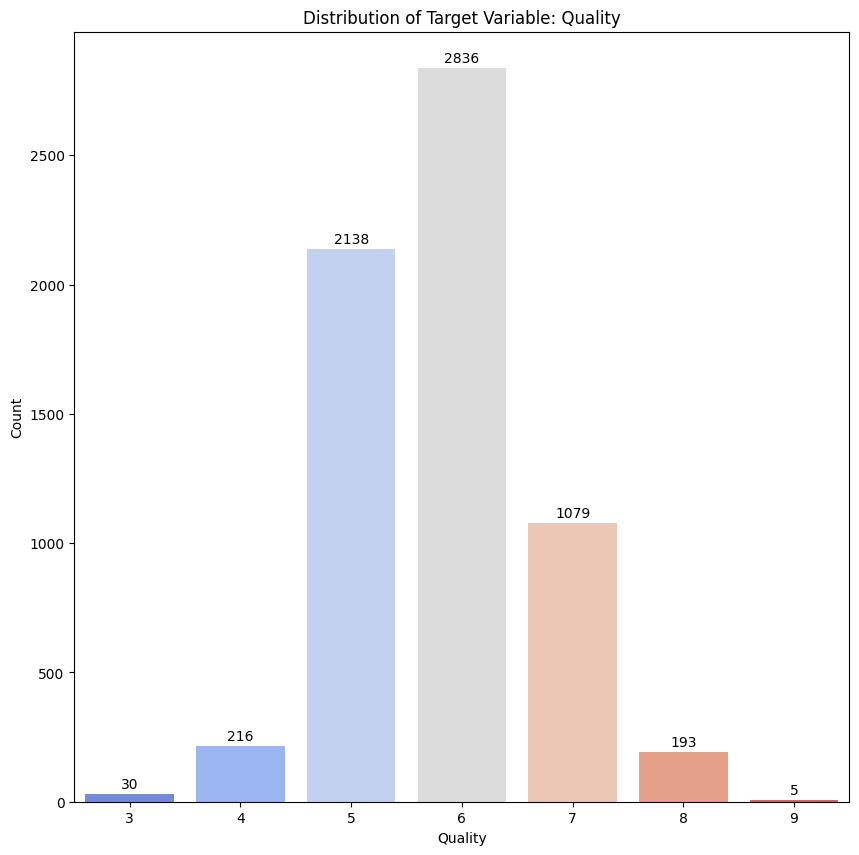

In [6]:
distribusi_target = df['quality'].value_counts().sort_index()

plt.figure(figsize=(10, 10))
sns.barplot(x=distribusi_target.index, y=distribusi_target.values, palette='coolwarm')
plt.title("Distribution of Target Variable: Quality")
plt.xlabel("Quality")
plt.ylabel("Count")

for i, count in enumerate(distribusi_target.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

The target variable, wine quality, is data with a quality range of 0 - 10. However, there are only 5 different qualities in the data, namely qualities 3 - 8. To create a model that can detect the quality of wine cannot use the classification method because not all types of quality have been recorded, the method that can be used is the regression method where the model can predict continuous data.

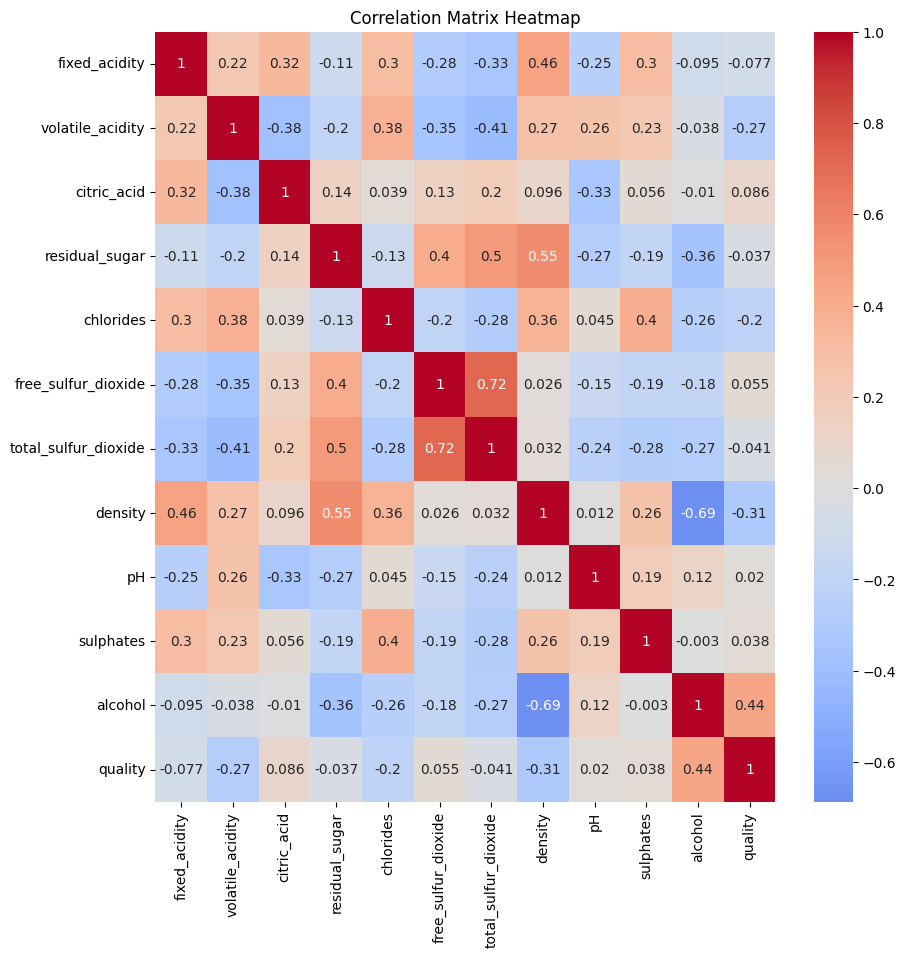

In [7]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()

As can be seen from the correlation heatmap, the analyzed variables are correlated with each other. While not many have high correlation values, this indicates a potentially significant relationship between some of the variables, which can provide insight into their interactions in the context of the model being built.

Although the density wine has a close range, this variable provides a lot of correlation to the other variables, hence it will not be removed in the training process.

## Checking For Missing Values

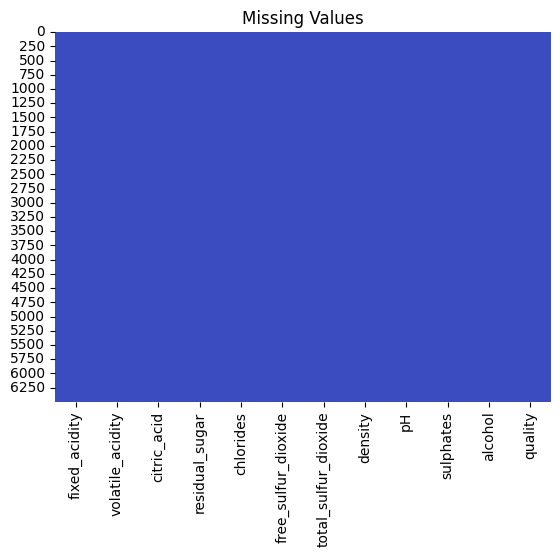

In [8]:
sns.heatmap(df.isnull(), cmap='coolwarm', cbar=False)
plt.title('Missing Values')
plt.show()

## Data Balancing

In [9]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [10]:
x= df.drop(['quality'],axis=1)
y= df['quality']

In [11]:
smote = SMOTE(random_state=42, k_neighbors=1)
x_sampled , y_sampled = smote.fit_resample(x,y)

In [12]:
df_sampled = pd.DataFrame(x_sampled, columns=x.columns)

In [13]:
df = pd.concat([df_sampled,y_sampled],axis=1)

In [14]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
df['quality'].value_counts()

quality
5    2836
6    2836
7    2836
4    2836
8    2836
3    2836
9    2836
Name: count, dtype: int64

## Outlier Detection

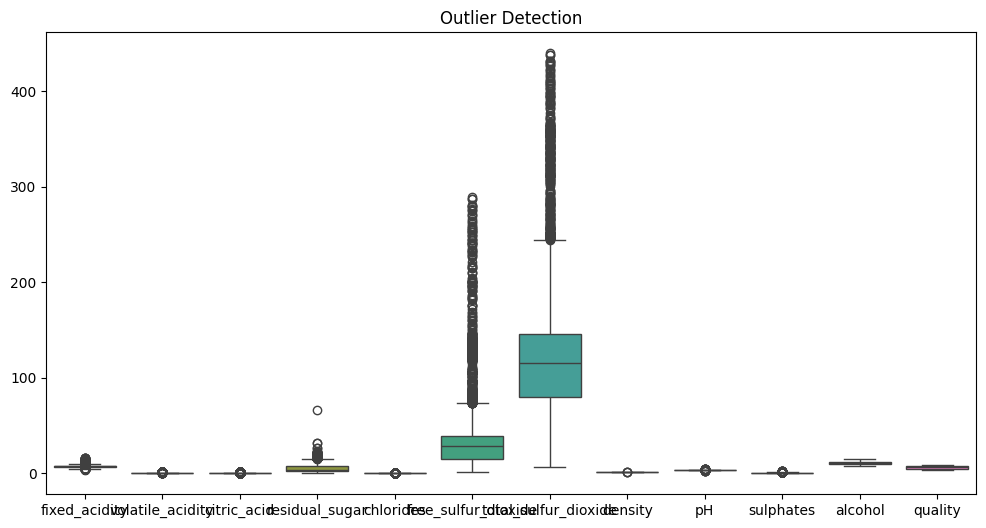

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.title('Outlier Detection')
plt.show()

In [17]:
def Outlier_r(columns,df):

    for col in columns:

        Q1 = df[col].quantile(0.25)

        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1

        lowerbound = Q1 - (1.5 * IQR)

        upperbound = Q3 + (1.5 * IQR)

        df = df[(df[col] >= lowerbound) & (df[col] <= upperbound)]

    return df

In [18]:
x=df.drop(['quality'],axis=1)

In [19]:
n_col = x.columns

In [20]:
n_col

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [21]:
df = Outlier_r(n_col,df)

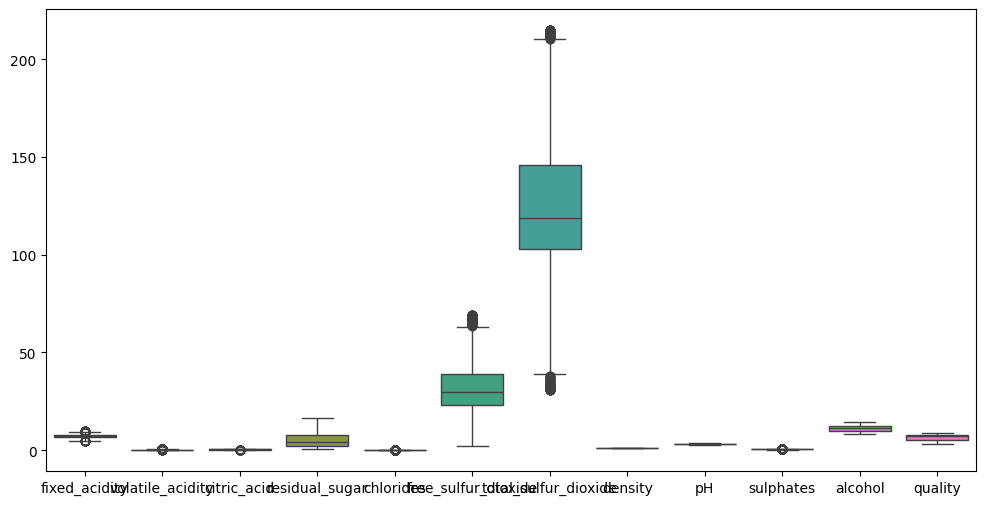

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.show()

In [23]:
def percent(cols , df):

    for col in cols:

        lowerbound = df[col].quantile(0.01)

        upperbound = df[col].quantile(0.99)



        df = df[(df[col] >= lowerbound) & (df[col] <= upperbound)]

    return df

In [24]:
df = percent(n_col,df)

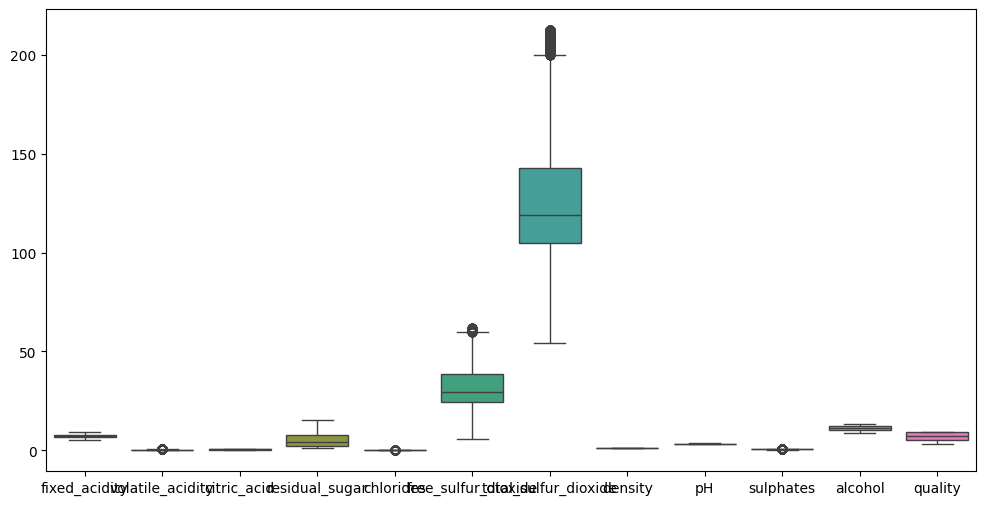

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.show()

## Data Distribution

In [26]:
df['fixed_acidity'].skew()

np.float64(0.34593456700834135)

In [27]:
from scipy.stats import boxcox

df['fixed_acidity'], lambda_boxcox = boxcox(df['fixed_acidity'])

In [28]:
df['volatile_acidity'].skew()

np.float64(0.8800500451302273)

In [29]:
df['volatile_acidity'], lambda_boxcox = boxcox(df['volatile_acidity'])

In [30]:
df['citric_acid'].skew()

np.float64(-0.03911220744291732)

In [31]:
df['citric_acid'] = df['citric_acid'] +1

In [32]:
df['citric_acid'], lambda_boxcox = boxcox(df['citric_acid'])

In [33]:
df['residual_sugar'].skew()

np.float64(0.8310180264276238)

In [34]:
df['residual_sugar'], lambda_boxcox = boxcox(df['residual_sugar'])

In [35]:
n_col

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [36]:
df['chlorides'].skew()

np.float64(0.6507642879528234)

In [37]:
df['chlorides'], lambda_boxcox = boxcox(df['chlorides'])

In [38]:
df['free_sulfur_dioxide'].skew()

np.float64(0.19240911709249048)

In [39]:
df['free_sulfur_dioxide'], lambda_boxcox = boxcox(df['free_sulfur_dioxide'])

In [40]:
df['total_sulfur_dioxide'].skew()

np.float64(0.6037482752687139)

In [41]:
df['total_sulfur_dioxide'], lambda_boxcox = boxcox(df['total_sulfur_dioxide'])

In [42]:
df['density'].skew()

np.float64(0.4361828888847838)

In [43]:
df['density'], lambda_boxcox = boxcox(df['density'])

In [44]:
df['sulphates'].skew()

np.float64(0.49636372645411025)

In [45]:
df['sulphates'], lambda_boxcox = boxcox(df['sulphates'])

In [46]:
df['alcohol'].skew()

np.float64(-0.23692118460936962)

In [47]:
df['alcohol'], lambda_boxcox = boxcox(df['alcohol'])

In [48]:
df['pH'].skew()

np.float64(-0.23607510186212996)

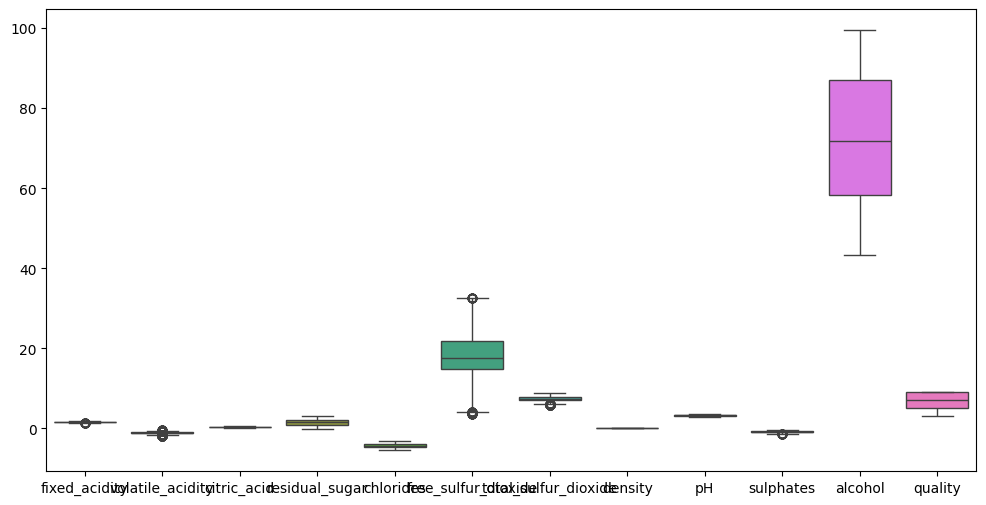

In [49]:
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.show()

## Balancing Data

In [50]:
x = df.drop(['quality'],axis=1)
y=df['quality']

In [51]:
x_sampled , y_sampled = smote.fit_resample(x,y)
df_sampled = pd.DataFrame(x_sampled, columns=x.columns)
df = pd.concat([df_sampled,y_sampled],axis=1)

## Scaling

In [52]:
scaler = StandardScaler()

In [53]:
x = df.drop(['quality'],axis=1)
y=df['quality']

In [54]:
x_scaled = scaler.fit_transform(x)

In [55]:
# df_scaled = scaler.fit_transform(df)

In [56]:
# df_scaled = pd.DataFrame(df_scaled, columns= df.columns)

In [57]:
# x = df_scaled.drop(['quality'],axis=1)

In [58]:
# y=df_scaled['quality']

In [59]:
y_scaler = MinMaxScaler()

In [60]:
y.value_counts()

quality
5    2769
6    2769
4    2769
7    2769
8    2769
3    2769
9    2769
Name: count, dtype: int64

## Splitting

In [61]:
x_train , x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [62]:
from sklearn.model_selection import ShuffleSplit , cross_val_score
cv=ShuffleSplit(n_splits=5, test_size =0.2, random_state=42)
cross_val_score(LogisticRegression(max_iter=5000),x_scaled,y,cv=cv).mean()

np.float64(0.5165849883930874)

# Model Training

## Logistic Regression

In [63]:
LR = LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.9, fit_intercept = True, C = 10)

In [64]:
LR.fit(x_train,y_train)

c:\Users\User\Desktop\Math ML Petit\TP\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10, l1_ratio=0.9, penalty='elasticnet', solver='saga')

In [65]:
LR_pred= LR.predict(x_test)

In [66]:
accuracy_score(y_test,LR_pred)

0.5233427908176425

## SVC

In [67]:
svc =SVC(kernel = 'rbf', gamma = 'scale', C = 10)

In [68]:
svc.fit(x_train,y_train)

SVC(C=10)

In [69]:
svc_pred = svc.predict(x_test)

In [70]:
accuracy_score(y_test,svc_pred)

0.9164302295589373

## Decision Tree

In [71]:
DT = DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 1, max_depth= 50, criterion= 'entropy')

In [72]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50)

In [73]:
DT_pred = DT.predict(x_test)

In [74]:
accuracy_score(y_test,DT_pred)

0.9094660820221822

## Random Forest

In [75]:
RF = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 2, max_depth= 20, bootstrap= False)

In [76]:
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=2,
                       n_estimators=200)

In [77]:
RF_pred = RF.predict(x_test)

In [78]:
accuracy_score(y_test,RF_pred)

0.9597627031209698

In [79]:
classes_presentes = np.unique(y_train)
print(classes_presentes)

[3 4 5 6 7 8 9]


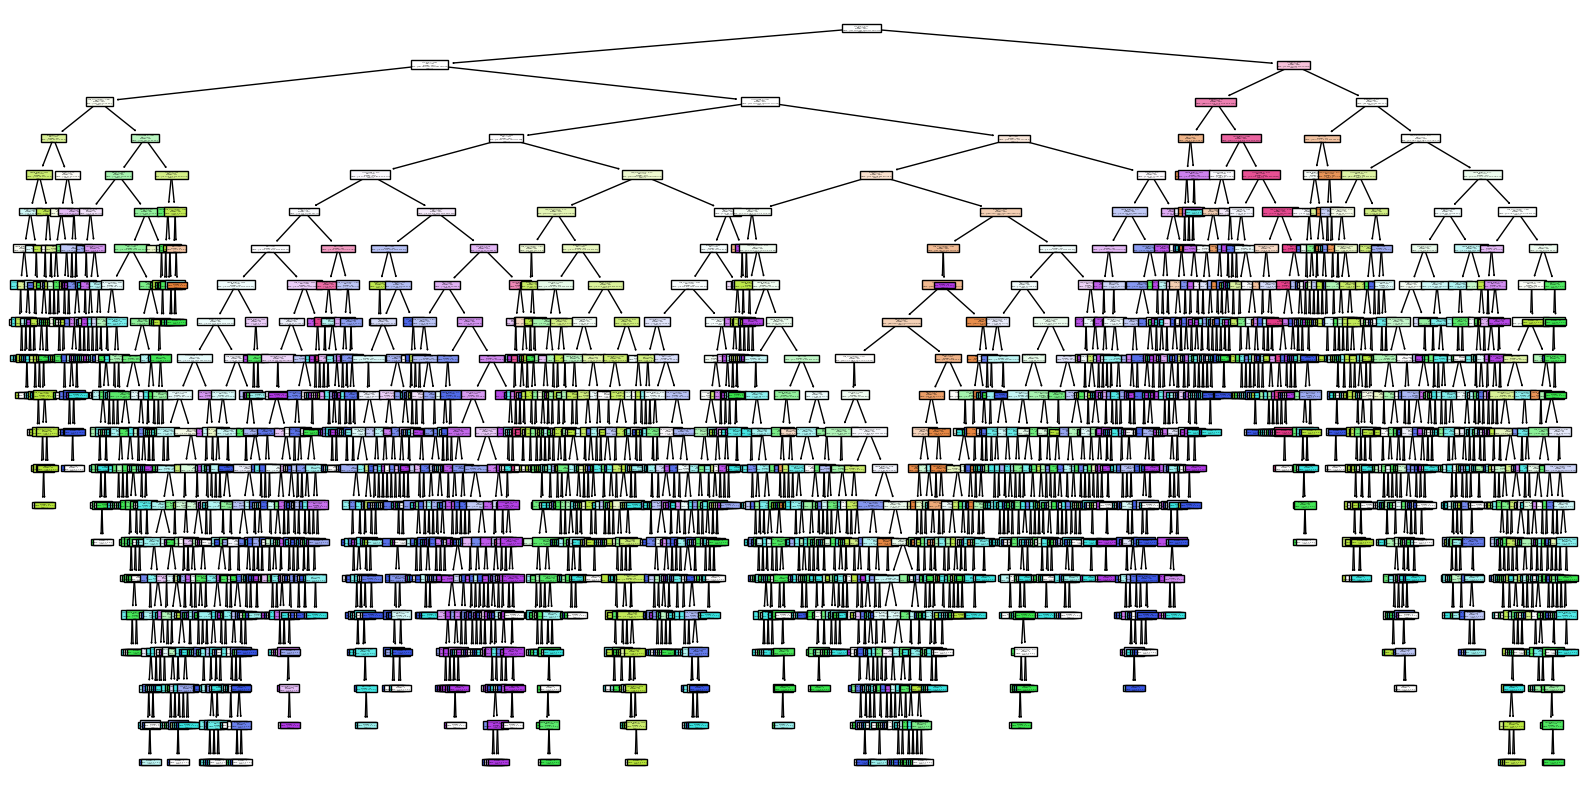

In [80]:
from sklearn import tree
arbre = RF.estimators_[0]

plt.figure(figsize=(20,10))
tree.plot_tree(arbre, feature_names=df.columns[:-1],
                   class_names=['3', '4', '5', '6', '7', '8', '9'],
                   filled=True)
plt.show()

## Gradient Boosting

In [81]:
GB = GradientBoostingClassifier(subsample = 0.6, n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, max_depth= 7, learning_rate= 0.05)

In [82]:
GB.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=7, n_estimators=200,
                           subsample=0.6)

In [83]:
GB_pred = GB.predict(x_test)

In [84]:
accuracy_score(y_test,GB_pred)

0.9401599174619552

## Kneighbors Classifier

In [85]:
KN = KNeighborsClassifier(weights = 'distance', n_neighbors = 3, metric = 'manhattan')

In [86]:
KN.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [87]:
KN_pred = KN.predict(x_test)

In [88]:
accuracy_score(y_test,KN_pred)

0.9556358008769668

In [89]:
import mglearn

# Evaluation

## ROC-Curve

In [90]:
models = {
    "Logistic Regression": LR,
    "Random Forest": RF,
    "Decision Tree": DT,
    "Kneighbors": KN,
    "Gradient Boosting": GB
}

In [91]:
for model_name, model in models.items():
  if len(np.unique(y_test)) > 2:  # Multi-class case
          roc_auc = roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr')
          print(f"ROC AUC for {model_name}: {roc_auc:.4f}")
  print("\n")

ROC AUC for Logistic Regression: 0.8490


ROC AUC for Random Forest: 0.9974


ROC AUC for Decision Tree: 0.9463


ROC AUC for Kneighbors: 0.9862


ROC AUC for Gradient Boosting: 0.9949




### ROC-Curve for Logistic Regression

Overall ROC AUC for Logistic Regression: 0.8490



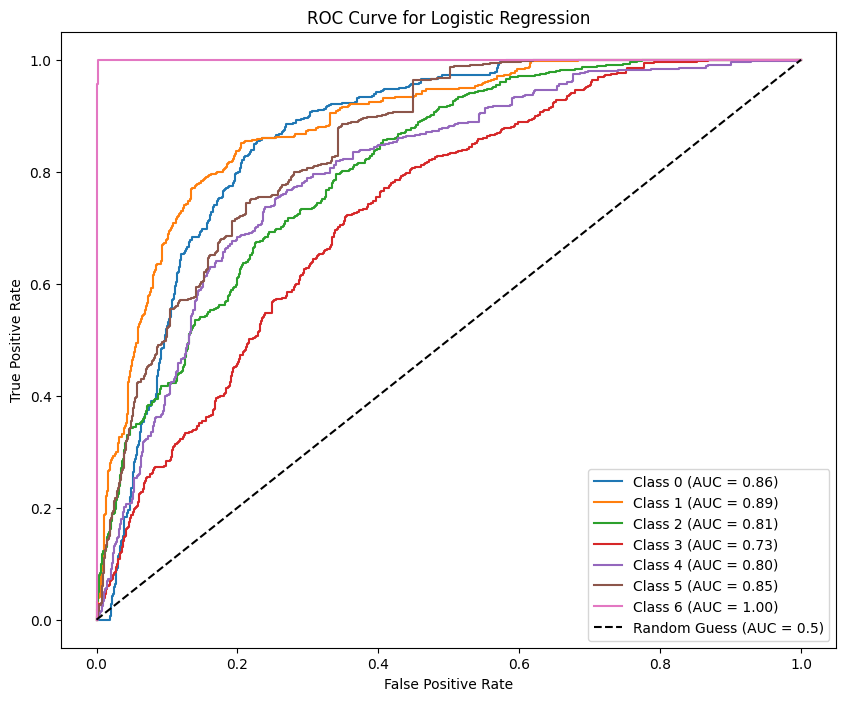

In [92]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]
y_score = LR.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

overall_auc = roc_auc_score(y_test_binarized, y_score, multi_class="ovr")
print(f"Overall ROC AUC for Logistic Regression: {overall_auc:.4f}\n")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.show()


### ROC-Curve of Decision Tree

Overall ROC AUC for Decision Tree: 0.9463



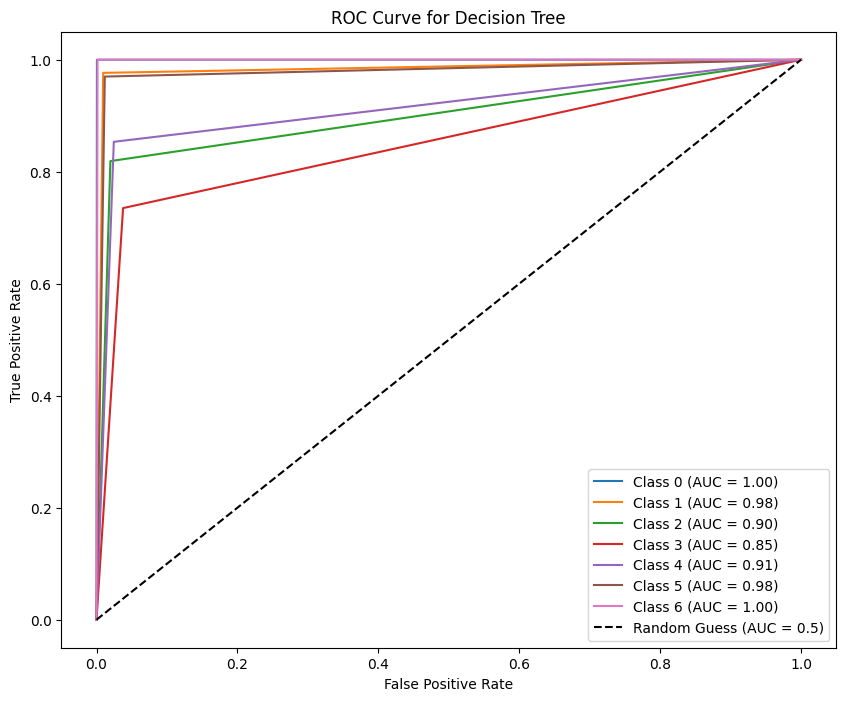

In [93]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]
y_score = DT.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

overall_auc = roc_auc_score(y_test_binarized, y_score, multi_class="ovr")
print(f"Overall ROC AUC for Decision Tree: {overall_auc:.4f}\n")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree")
plt.legend(loc="lower right")
plt.show()


### ROC-Curve Random Forest

Overall ROC AUC for Random Forest: 0.9974



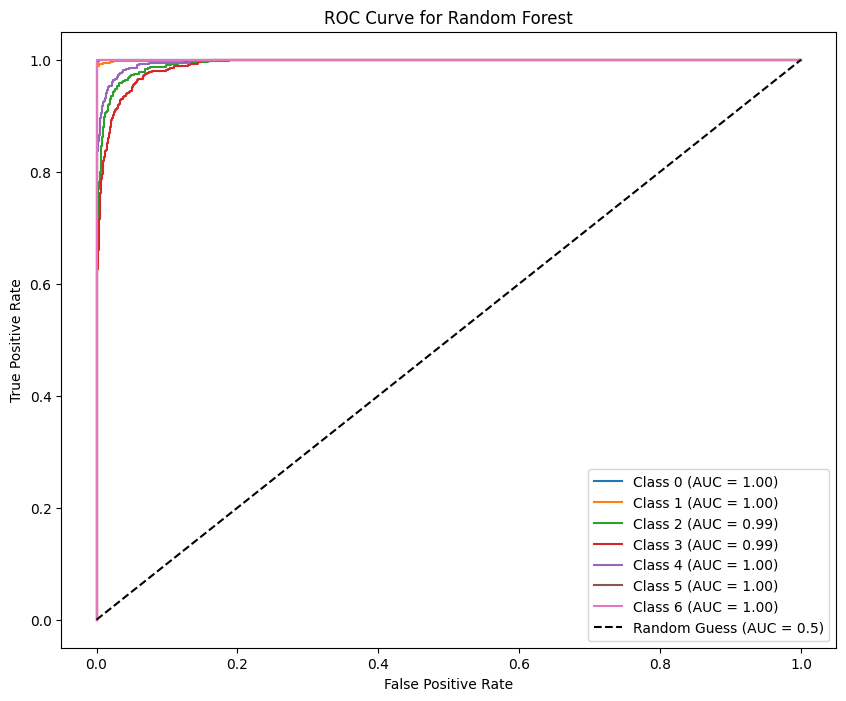

In [94]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]
y_score = RF.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

overall_auc = roc_auc_score(y_test_binarized, y_score, multi_class="ovr")
print(f"Overall ROC AUC for Random Forest: {overall_auc:.4f}\n")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend(loc="lower right")
plt.show()


### ROC-Curve of Gradient Boosting Tree

Overall ROC AUC for Gradient Boosting Tree: 0.9949



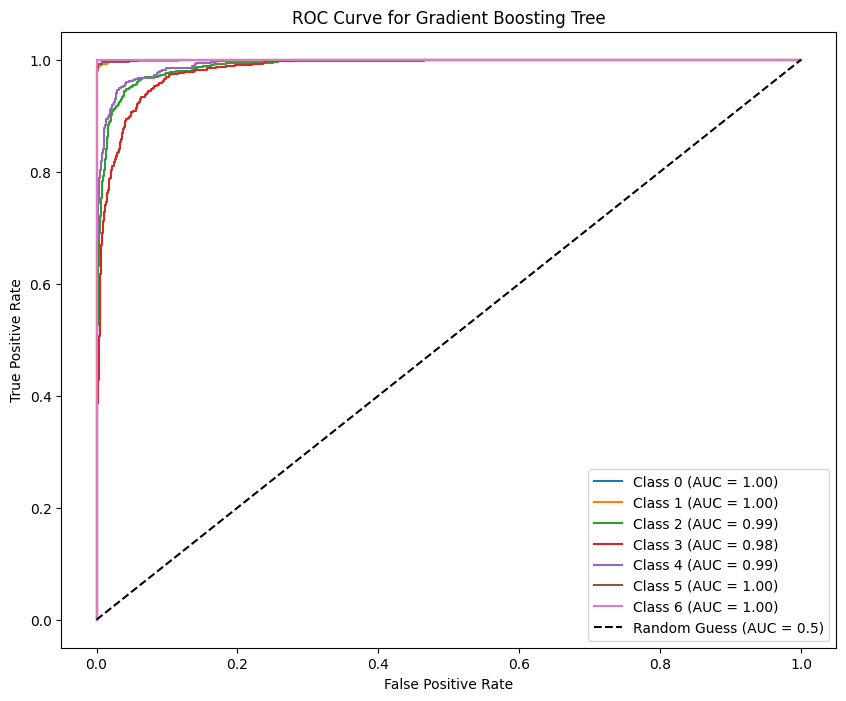

In [95]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]
y_score = GB.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

overall_auc = roc_auc_score(y_test_binarized, y_score, multi_class="ovr")
print(f"Overall ROC AUC for Gradient Boosting Tree: {overall_auc:.4f}\n")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Gradient Boosting Tree")
plt.legend(loc="lower right")
plt.show()


### ROC-Curve of Support Vector Model

Overall ROC AUC for Support Vector Classifier Model: 0.9733



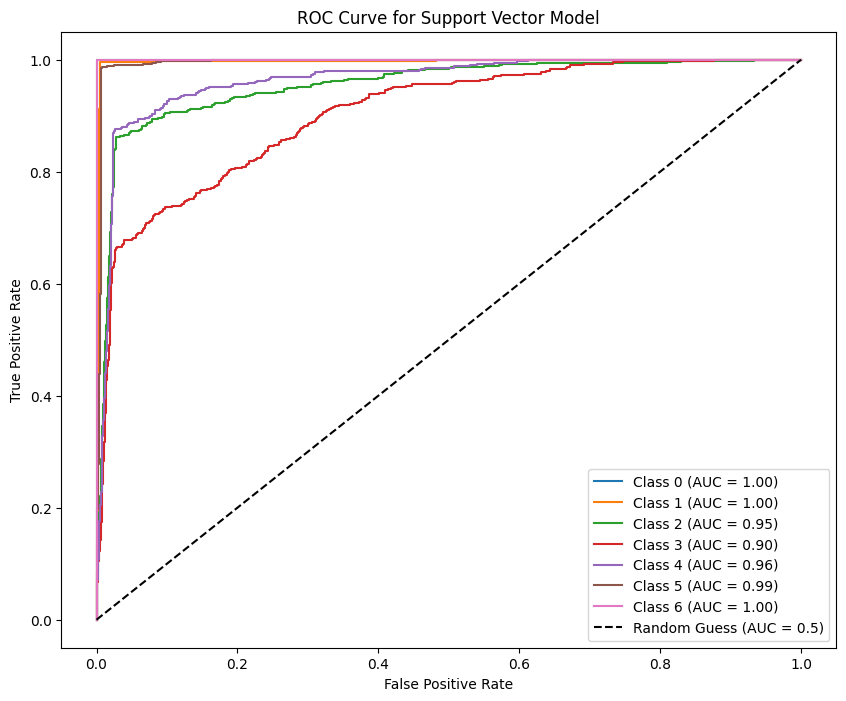

In [96]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]
y_score = svc.decision_function(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

overall_auc = roc_auc_score(y_test_binarized, y_score, multi_class="ovr")
print(f"Overall ROC AUC for Support Vector Classifier Model: {overall_auc:.4f}\n")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Support Vector Model")
plt.legend(loc="lower right")
plt.show()


### ROC-Curve of Kneighbors Model

Overall ROC AUC for Kneighbors Classifier: 0.9862



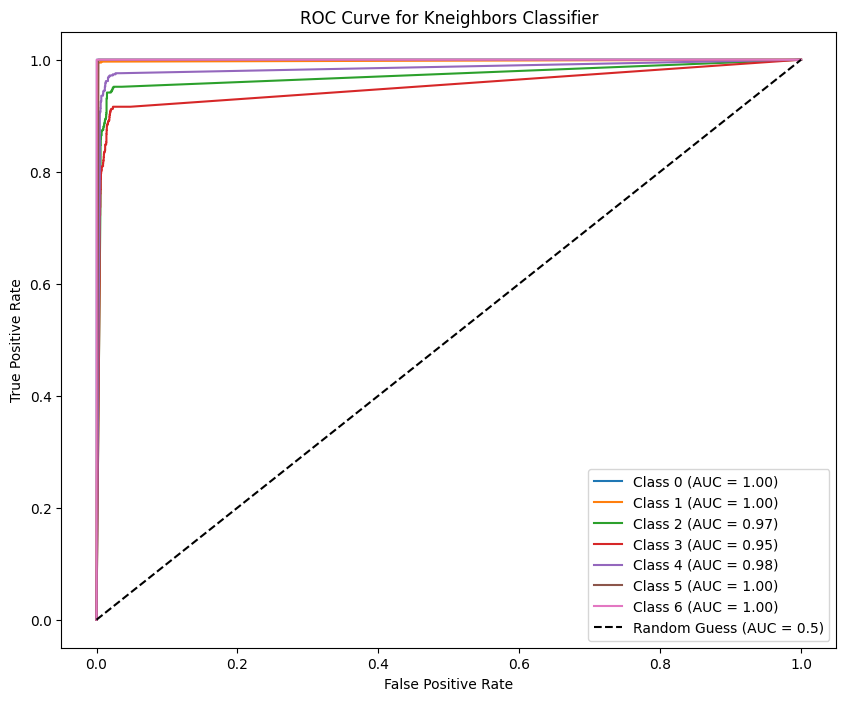

In [97]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]
y_score = KN.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

overall_auc = roc_auc_score(y_test_binarized, y_score, multi_class="ovr")
print(f"Overall ROC AUC for Kneighbors Classifier: {overall_auc:.4f}\n")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Kneighbors Classifier")
plt.legend(loc="lower right")
plt.show()


## Classification Report

### Logistic Regression

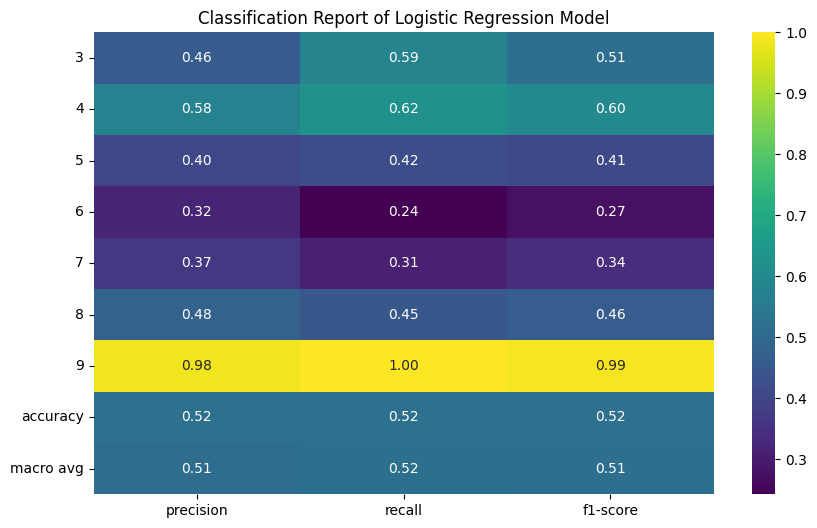

In [98]:
LR_report = classification_report(y_test, LR_pred, output_dict=True)
# Convert the classification report to a DataFrame
LR_report_df = pd.DataFrame(LR_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(LR_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Logistic Regression Model")
plt.show()

### Support Vector Classifier

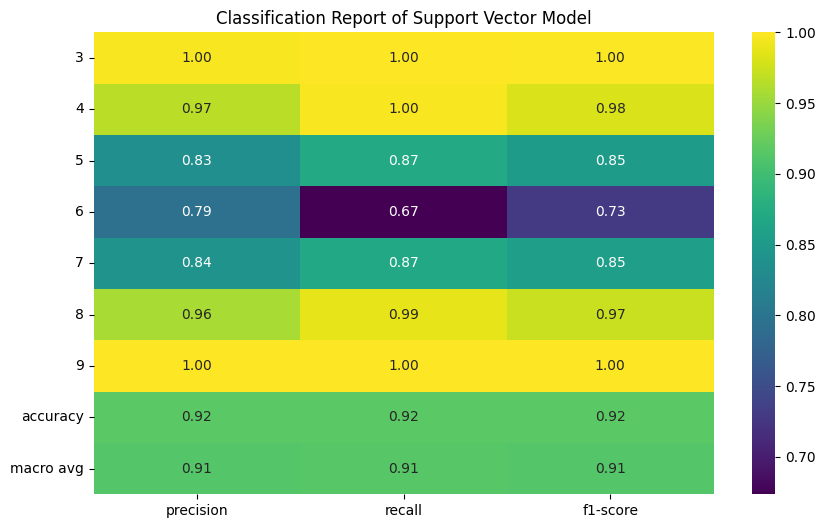

In [99]:
svc_report = classification_report(y_test, svc_pred, output_dict=True)
# Convert the classification report to a DataFrame
svc_report_df = pd.DataFrame(svc_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(svc_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Support Vector Model")
plt.show()

### Decision Tree

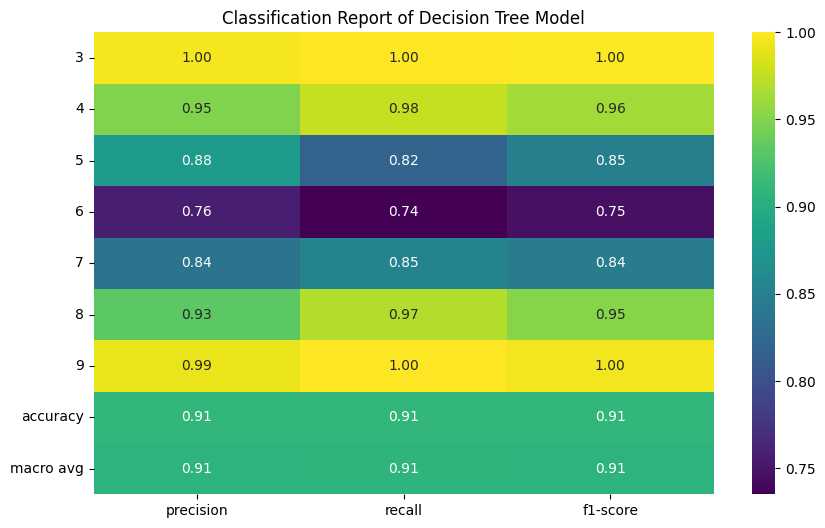

In [100]:
DT_report = classification_report(y_test, DT_pred, output_dict=True)
# Convert the classification report to a DataFrame
DT_report_df = pd.DataFrame(DT_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(DT_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Decision Tree Model")
plt.show()

### Random Forest

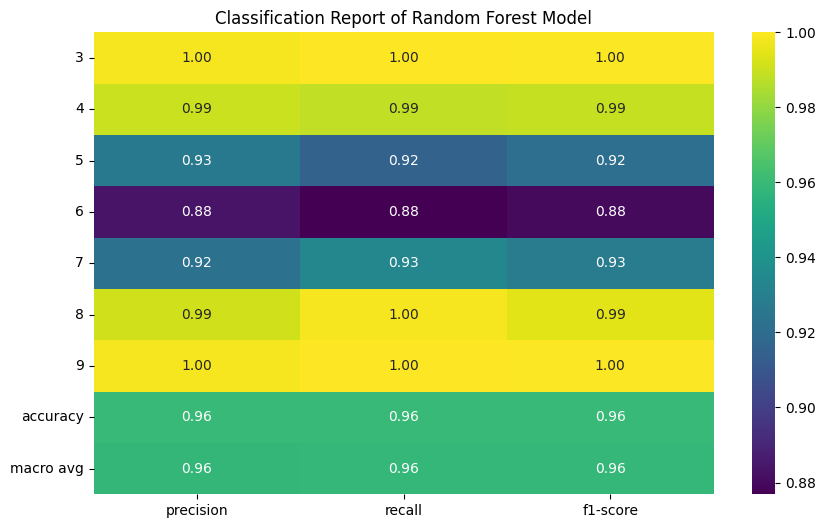

In [101]:
RF_report = classification_report(y_test, RF_pred, output_dict=True)
# Convert the classification report to a DataFrame
RF_report_df = pd.DataFrame(RF_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(RF_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Random Forest Model")
plt.show()

### Gradient Boosting Tree

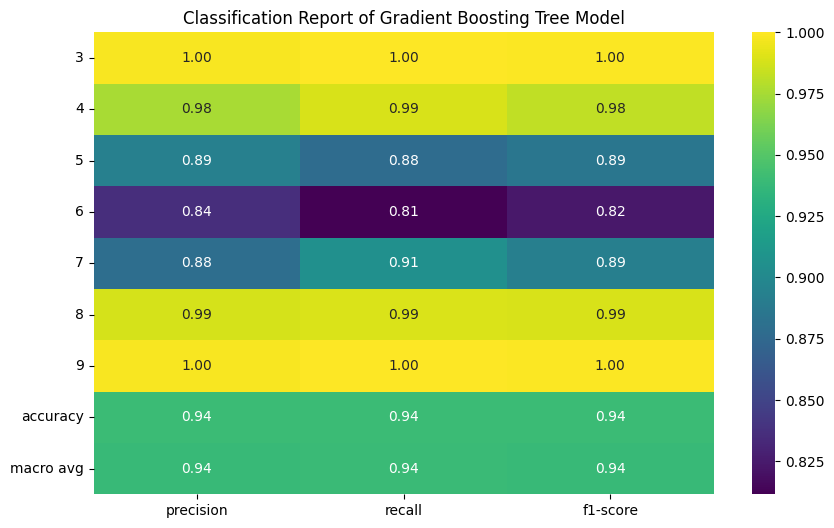

In [102]:
GB_report = classification_report(y_test, GB_pred, output_dict=True)
# Convert the classification report to a DataFrame
GB_report_df = pd.DataFrame(GB_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(GB_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Gradient Boosting Tree Model")
plt.show()

### Kneighbors

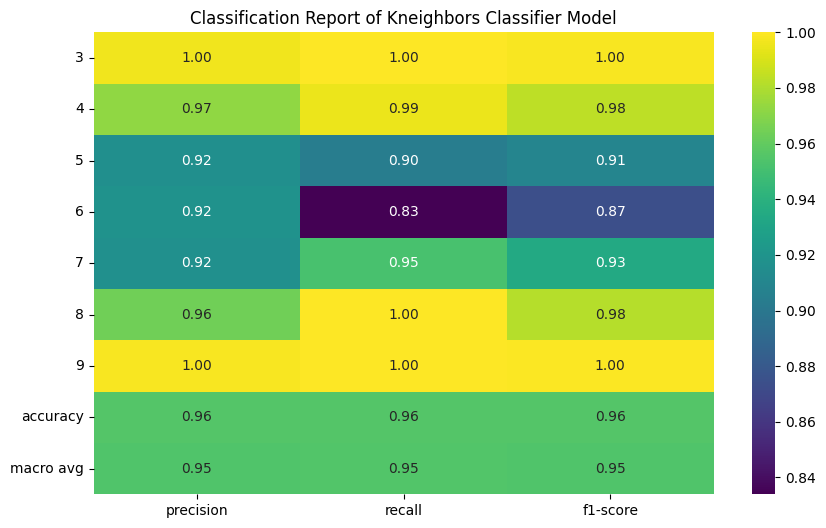

In [103]:
KN_report = classification_report(y_test, KN_pred, output_dict=True)
# Convert the classification report to a DataFrame
KN_report_df = pd.DataFrame(KN_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(KN_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Kneighbors Classifier Model")
plt.show()

## Confusion Matrix

### Logistic Regression

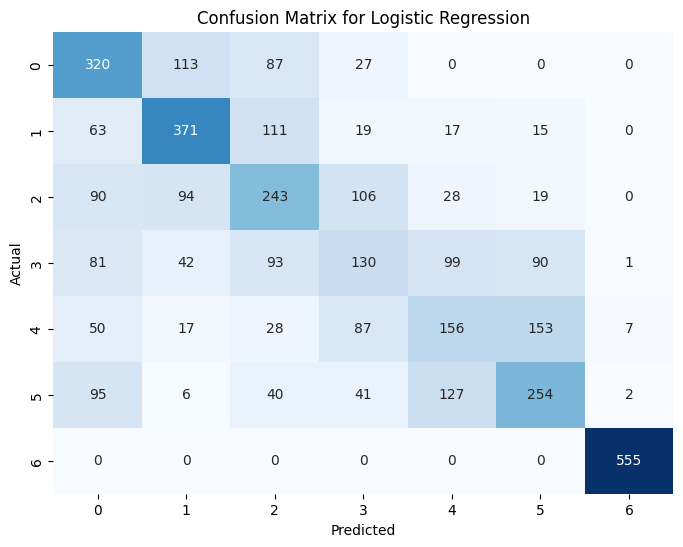

In [104]:
cm = confusion_matrix(y_test, LR_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Support Vector

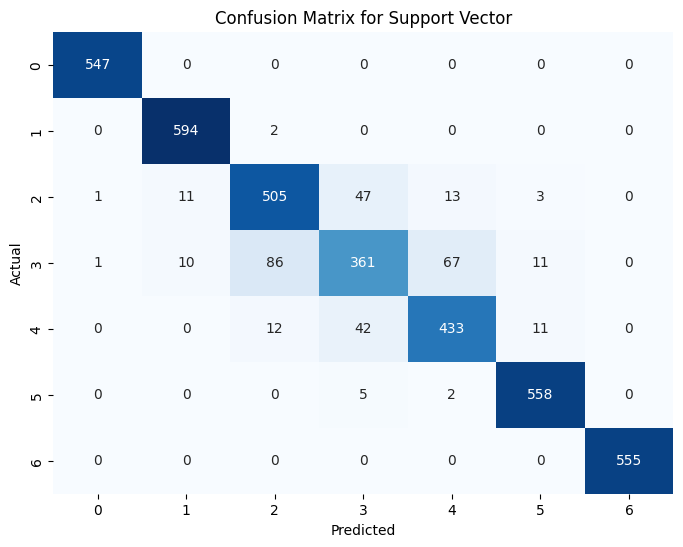

In [105]:
cm = confusion_matrix(y_test, svc_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',cbar=False)
plt.title('Confusion Matrix for Support Vector')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


##

### Decision Tree

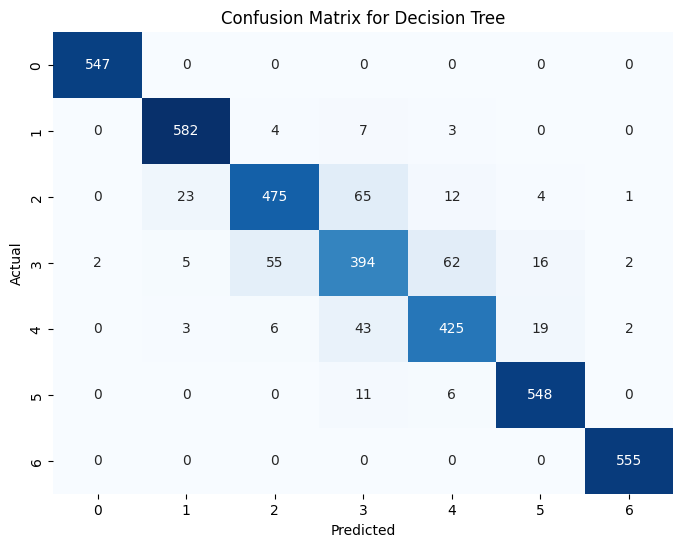

In [106]:
cm = confusion_matrix(y_test, DT_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',cbar=False)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Random Forest

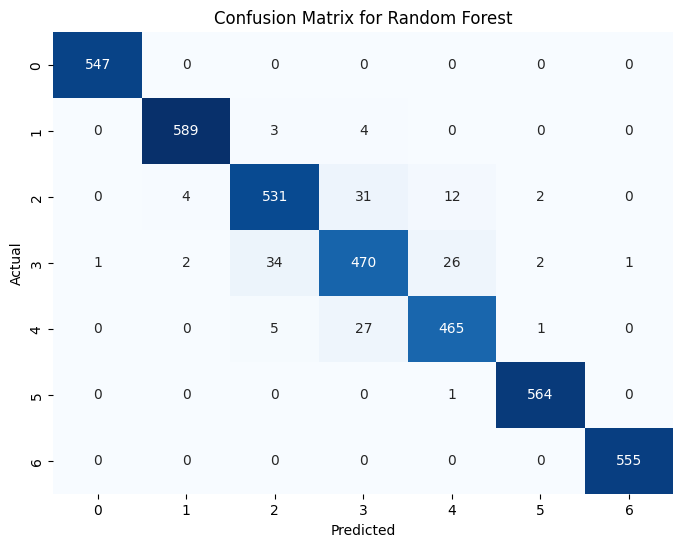

In [107]:
cm = confusion_matrix(y_test, RF_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Gradient Boosting Tree

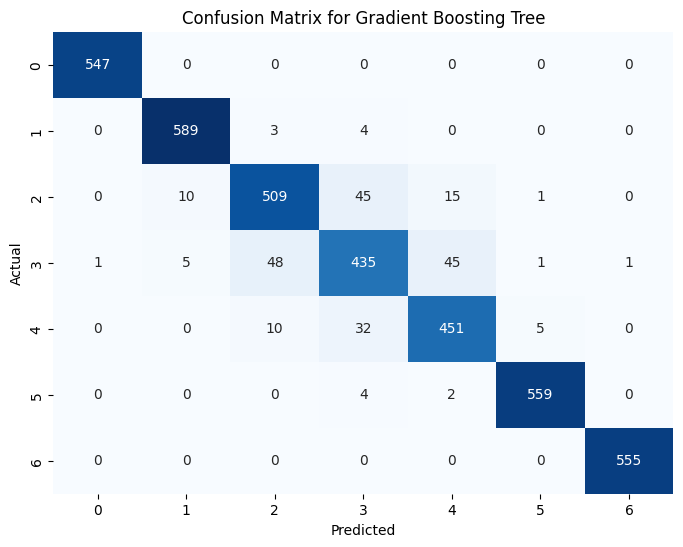

In [108]:
cm = confusion_matrix(y_test, GB_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',cbar=False)
plt.title('Confusion Matrix for Gradient Boosting Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Kneighbors

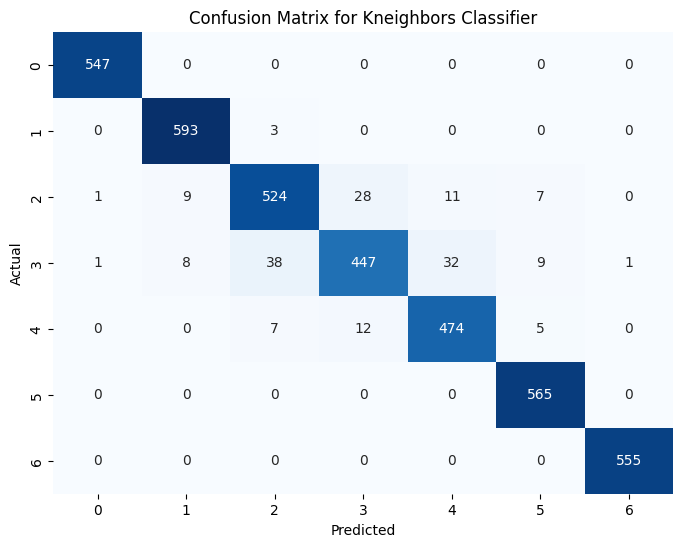

In [109]:
cm = confusion_matrix(y_test, KN_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',cbar=False)
plt.title('Confusion Matrix for Kneighbors Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Accuracy

C:\Users\User\AppData\Local\Temp\ipykernel_15560\1799935860.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")


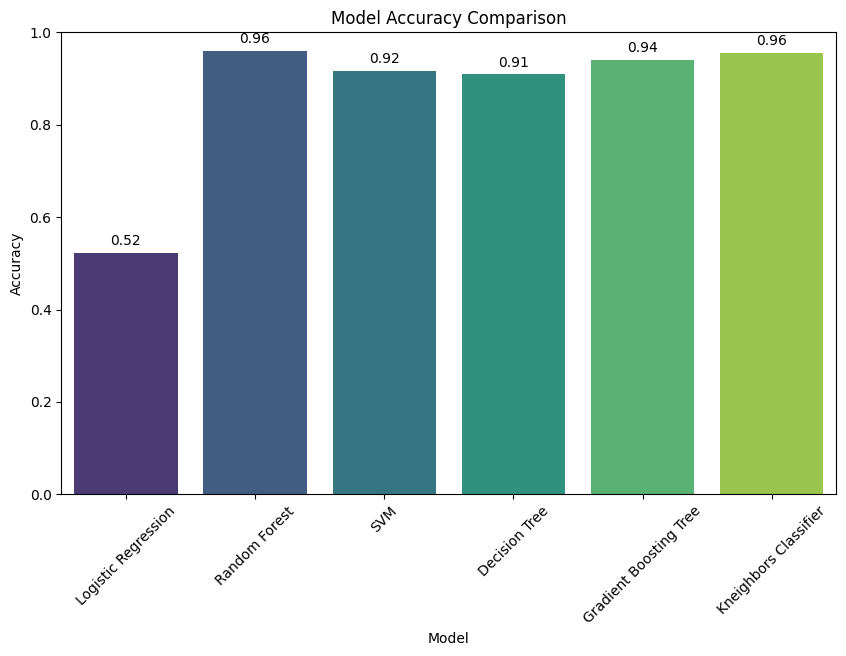

In [110]:
models = {
    'Logistic Regression': LR,
    'Random Forest': RF,
    'SVM': svc,
    'Decision Tree': DT,
    'Gradient Boosting Tree': GB,
    'Kneighbors Classifier': KN
}
accuracies = {}

for model_name, model in models.items():
    y_test_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    accuracies[model_name] = accuracy

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")

for i, (model_name, accuracy) in enumerate(accuracies.items()):
    plt.text(i, accuracy + 0.01, f"{accuracy:.2f}", ha='center', va='bottom', fontsize=10)

plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


In [111]:
import os
os.environ["USE_NOTEBOOK_TQDM"] = "False"  # Force console progress bars

from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)
print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 15506, number of used features: 11
[LightGBM] [Info] Start training from score -1.942819
[LightGBM] [Info] Start training from score -1.965118
[LightGBM] [Info] Start training from score -1.957782
[LightGBM] [Info] Start training from score -1.937881
[LightGBM] [Info] Start training from score -1.921007
[LightGBM] [Info] Start training from score -1.950953
[LightGBM] [Info] Start training from score -1.946426
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
ExtraTreesClassifier               0.96               0.96    None      0.96   
LabelPropagation  

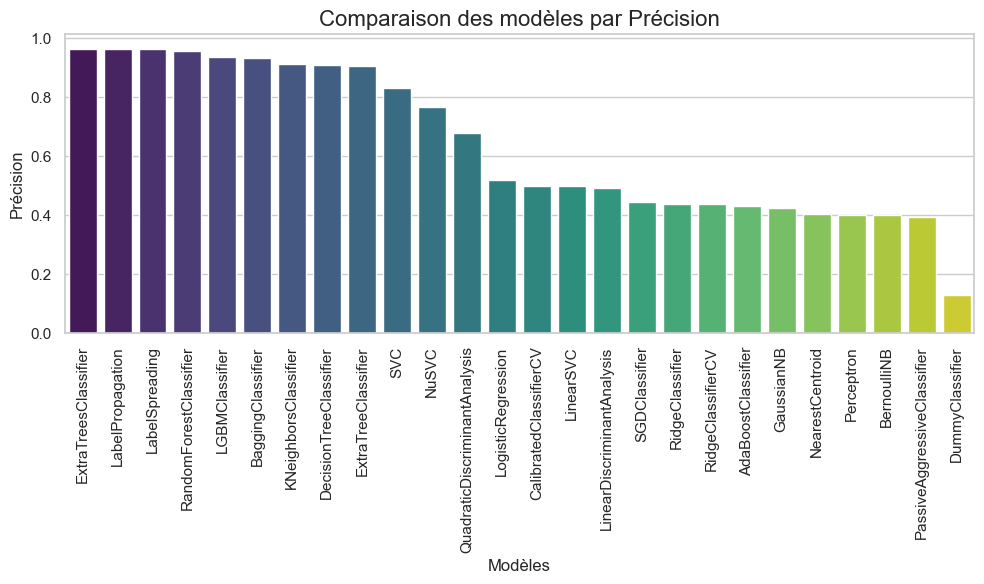

In [113]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
accuracy_plot = sns.barplot(x=models.index, y='Accuracy', data=models, palette="viridis")
accuracy_plot.set_title('Comparaison des modèles par Précision', fontsize=16)
accuracy_plot.set_xlabel('Modèles', fontsize=12)
accuracy_plot.set_ylabel('Précision', fontsize=12)
plt.xticks(rotation=90)  # Pour faire pivoter les noms des modèles si nécessaires
plt.tight_layout()
plt.show()


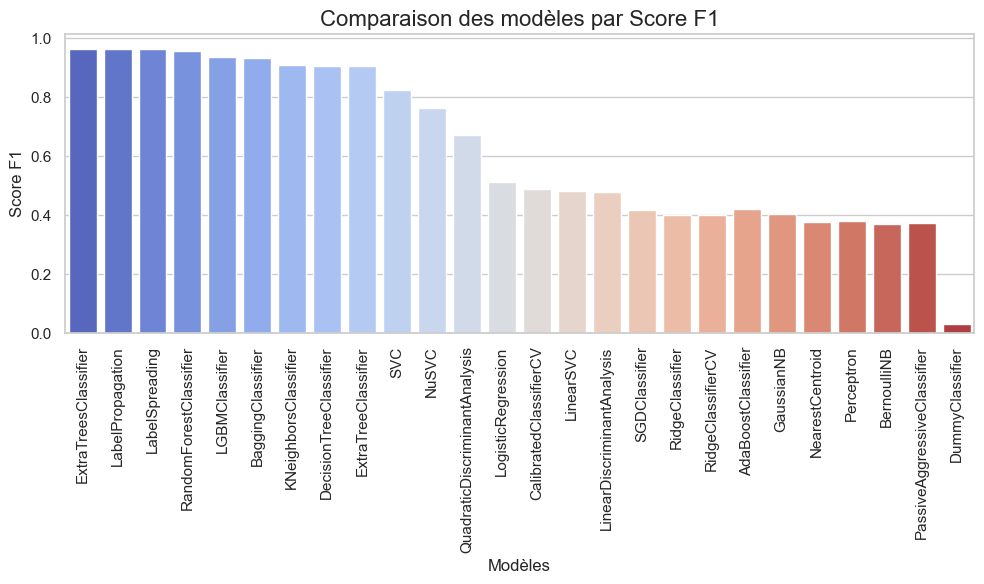

In [114]:
# Tracé du score F1 pour chaque modèle
plt.figure(figsize=(10, 6))
f1_plot = sns.barplot(x=models.index, y='F1 Score', data=models, palette="coolwarm")
f1_plot.set_title('Comparaison des modèles par Score F1', fontsize=16)
f1_plot.set_xlabel('Modèles', fontsize=12)
f1_plot.set_ylabel('Score F1', fontsize=12)
plt.xticks(rotation=90)  # Pour faire pivoter les noms des modèles si nécessaires
plt.tight_layout()
plt.show()


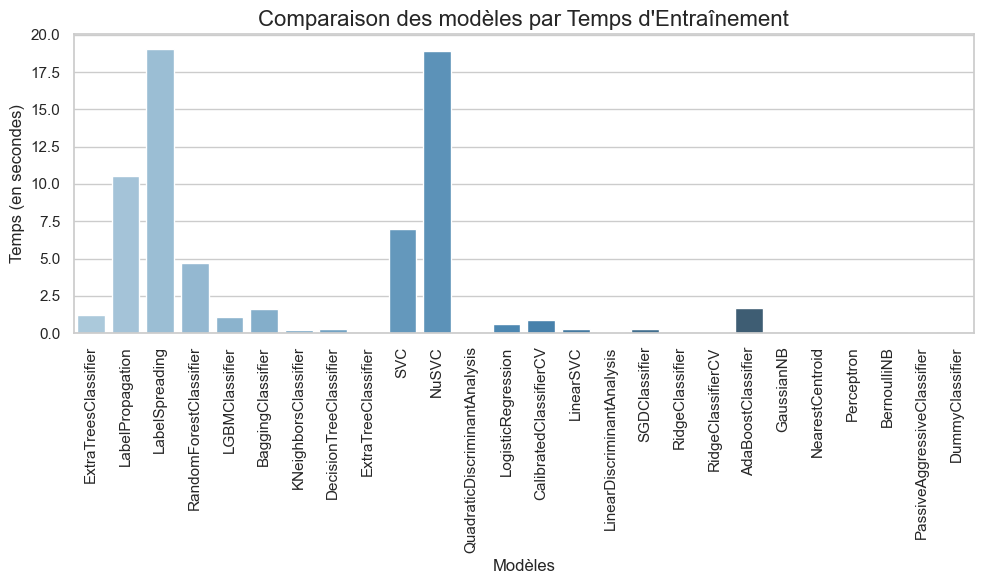

In [115]:
# Tracé du temps d'entraînement pour chaque modèle
plt.figure(figsize=(10, 6))
time_plot = sns.barplot(x=models.index, y='Time Taken', data=models, palette="Blues_d")
time_plot.set_title('Comparaison des modèles par Temps d\'Entraînement', fontsize=16)
time_plot.set_xlabel('Modèles', fontsize=12)
time_plot.set_ylabel('Temps (en secondes)', fontsize=12)
plt.xticks(rotation=90)  # Pour faire pivoter les noms des modèles si nécessaires
plt.tight_layout()
plt.show()


Index(['Accuracy', 'Balanced Accuracy', 'ROC AUC', 'F1 Score', 'Time Taken'], dtype='object')


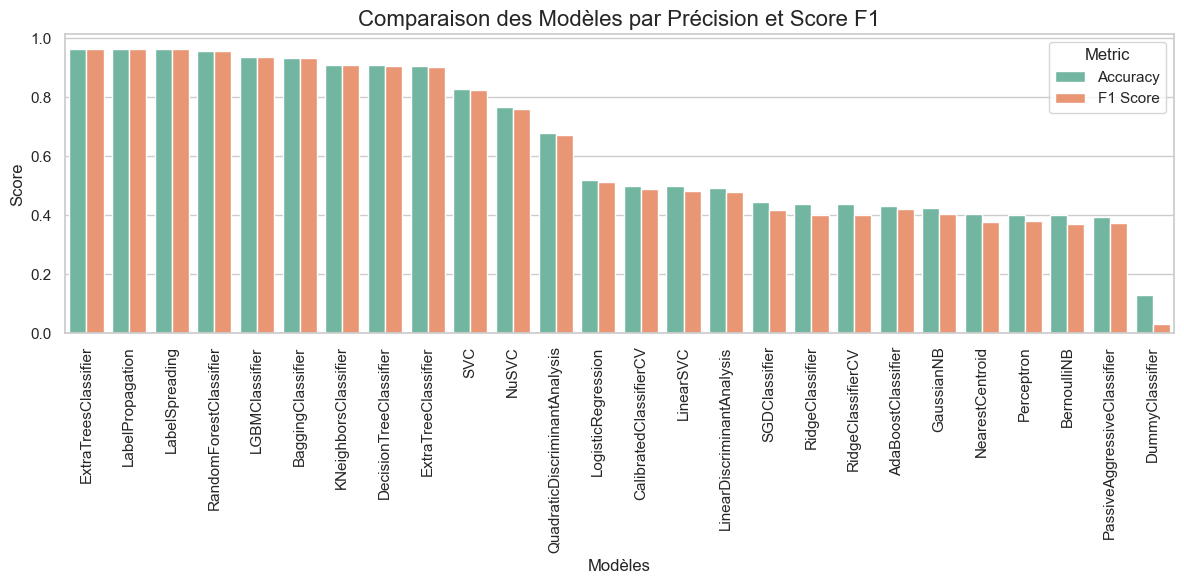

In [116]:
# Vérifier les colonnes disponibles dans le DataFrame models
print(models.columns)

# Réinitialiser l'index et mélanger les colonnes pertinentes
comparison_df = models[['Accuracy', 'F1 Score']].reset_index()

# Utiliser la colonne valide pour l'id_vars, ici 'index' sera remplacée par le nom des modèles (par exemple, 'Model')
comparison_df = comparison_df.melt(id_vars='Model', value_vars=['Accuracy', 'F1 Score'], var_name='Metric', value_name='Score')

# Tracé avec Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(x='Model', y='Score', hue='Metric', data=comparison_df, palette="Set2")

plt.title('Comparaison des Modèles par Précision et Score F1', fontsize=16)
plt.xlabel('Modèles', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=90)  # Rotation des étiquettes si nécessaire
plt.tight_layout()
plt.show()
